In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [122]:
dataset = pd.read_csv('online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [123]:
lb = LabelEncoder()
dataset['Month'] = lb.fit_transform(dataset['Month'])
dataset.dropna(inplace=True)
print(dataset['Month'])

0        2
1        2
2        2
3        2
4        2
        ..
12325    1
12326    7
12327    7
12328    7
12329    7
Name: Month, Length: 12316, dtype: int64


In [124]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [125]:
le = LabelEncoder()
X[:, 16] = le.fit_transform(X[:, 16])
print(X[:,16])

[0 0 0 ... 1 0 1]


In [126]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [127]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[:,15])

[1 2 1 ... 2 2 2]


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Começando a ANN



In [130]:
pip install MiniSom

In [131]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.05263158,
        0.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.10526316,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.63157895,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.25      , 0.52631579,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.05263158,
        1.        ]])

In [141]:
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = 19, sigma = 1.3, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

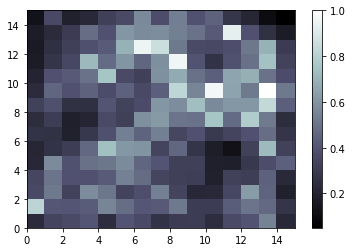

In [142]:
# Quanto mais próximo de 0, mais escuro.
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

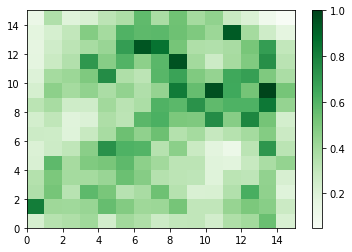

In [187]:
# Com a cor verde, o contrário, quanto mais se aproxima de 0, a cor fica mais clara.
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T, cmap='Greens')
colorbar()
show()

In [1]:
#Se o y é igual a 0 é um círculo e se for 1 é o losango.
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 'D']
colors  = ['blue', 'red']
for i, x in enumerate(X):
    w = som.winner(x)
    #soma 0.5 para centralizar
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 12,
         markeredgewidth = 2)
show()


NameError: name 'som' is not defined

<Figure size 432x288 with 0 Axes>

In [190]:
mappings = som.win_map(X)
receita_negativa = np.concatenate((mappings[(0,8)], mappings[(1,3)]), axis = 0)
receita_negativa = sc.inverse_transform(receita_negativa)
for site in receita_negativa:
    print(site[0])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
